In [132]:
%matplotlib inline


In [25]:
import seaborn as sns
import pandas as pd
import sys
import glob
import matplotlib.patches as mpatches
import math


bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/flickr-scaling-all/flickr-scaling-all.csv"
policy_labels = {'constant:0': 'Convolve via Loops', 'constant:1': 'Convolve via Matrix Multiply',
                 'constant:2': 'Convolve via FFT', 'oracle:min': 'Oracle'}

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards

In [28]:
df = bandit_rewards
df = df[df['globalTime'] > 0]
df = df[df['numParts'] > 8]
#df = df[df['numParts'] == 16]
#sns.set_style("whitegrid")
#sns.barplot(y='policy', x='globalTime', hue='disableMulticore', data=df)
df

,partition_id,pos_in_partition,canonical_tuple_id,img_x_dim,img_y_dim,filter_rows,filter_cols,system_nano_start_time,system_nano_end_time,arm,...,nonstationarity,crops,patches,driftRate,driftCoefficient,clusterCoefficient,communicationRate,disableMulticore,numParts,globalTime
8091,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,stationary,"0,0,0.5,0.5","25,5",999981s,999981,999981,5s,False,64,141870
16183,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,stationary,"0,0,0.5,0.5","5,3:5,20:8,30:24,5:25,1",999981s,999981,999981,5s,False,64,62264
24275,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,stationary,"0,0,0.5,0.5","8,50",999981s,999981,999981,5s,False,64,163717
32367,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,stationary,"0,0,0.5,0.5","25,5",999981s,999981,999981,5s,False,64,225309
40459,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,stationary,"0,0,0.5,0.5","5,3:5,20:8,30:24,5:25,1",999981s,999981,999981,5s,False,64,98942
48551,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,stationary,"0,0,0.5,0.5","8,50",999981s,999981,999981,5s,False,64,126387
56643,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,stationary,"0,0,0.5,0.5","25,5",999981s,999981,999981,5s,False,64,77254
64735,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,stationary,"0,0,0.5,0.5","5,3:5,20:8,30:24,5:25,1",999981s,999981,999981,5s,False,64,190761
72827,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,stationary,"0,0,0.5,0.5","8,50",999981s,999981,999981,5s,False,64,780607
80919,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,stationary,"0,0,0.5,0.5","25,5",15s,10000000000,10000000000,500ms,False,64,78162


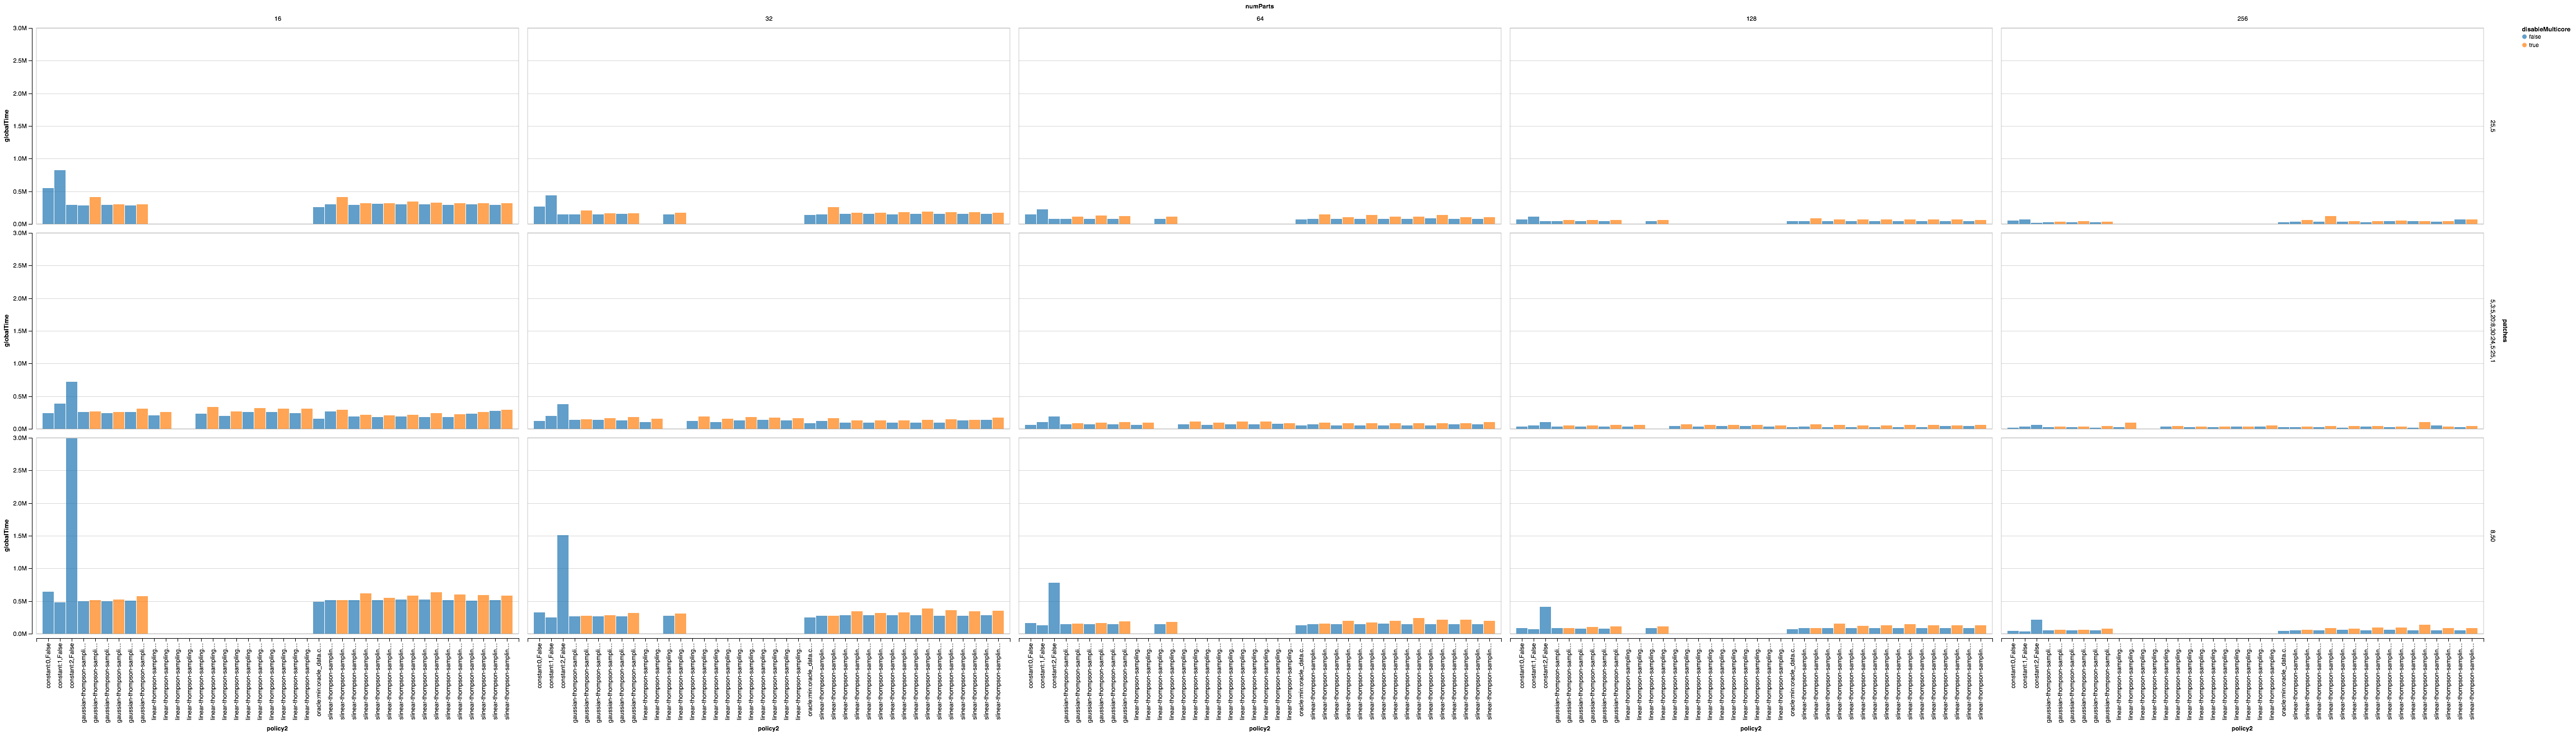

In [31]:
from vega import VegaLite

df2 = df.copy()
df2["policy2"] = df2["policy"] + ',' + df2["disableMulticore"].map(str)
VegaLite({
  "mark": "bar",
  "encoding": {
    "y": {"type": "quantitative","field": "globalTime"},
    "x": {"type": "nominal","field": "policy2"},

    "color": {"type": "nominal","field": "disableMulticore"},

    "column": {"type": "quantitative", "field": "numParts"},
      "row": {"type": "nominal", "field": "patches"}
  }
}, df2)


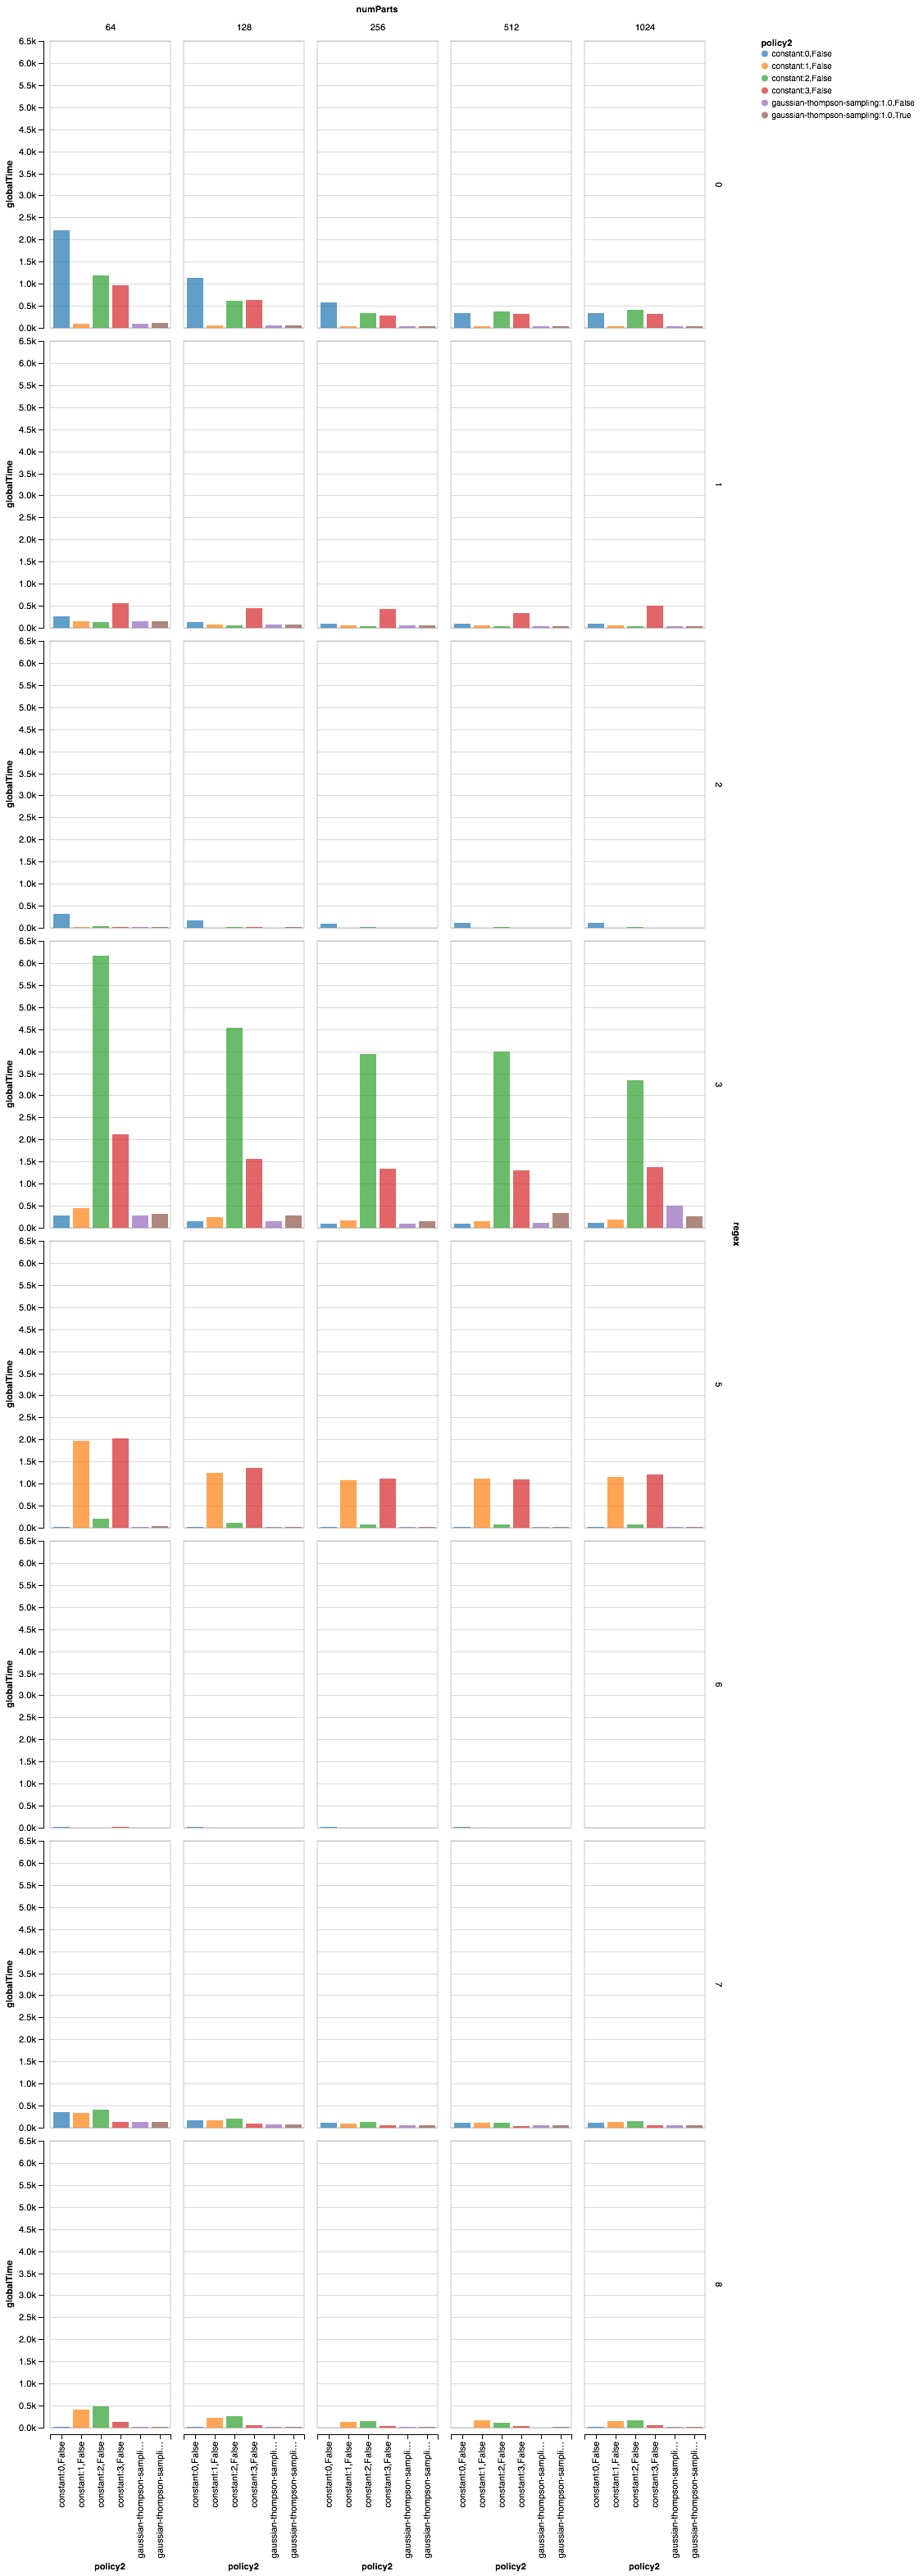

In [39]:
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/commoncrawl-scaling/commoncrawl-scaling-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards
df = df[df['globalTime'] > 0]
df = df[df['regex'] != 4]

#df = df[df['policy'] == 'constant:0']


df2 = df.copy()
df2['globalTime'] = df2['globalTime']/1e3
df2["policy2"] = df2["policy"] + ',' + df2["disableMulticore"].map(str)
VegaLite({
  "mark": "bar",
  "encoding": {
    "y": {"type": "quantitative","field": "globalTime"},
    "x": {"type": "nominal","field": "policy2"},

    "color": {"type": "nominal","field": "policy2"},

    "column": {"type": "quantitative", "field": "numParts"},
      "row": {"field": "regex", "type": 'nominal'}
  }
}, df2)



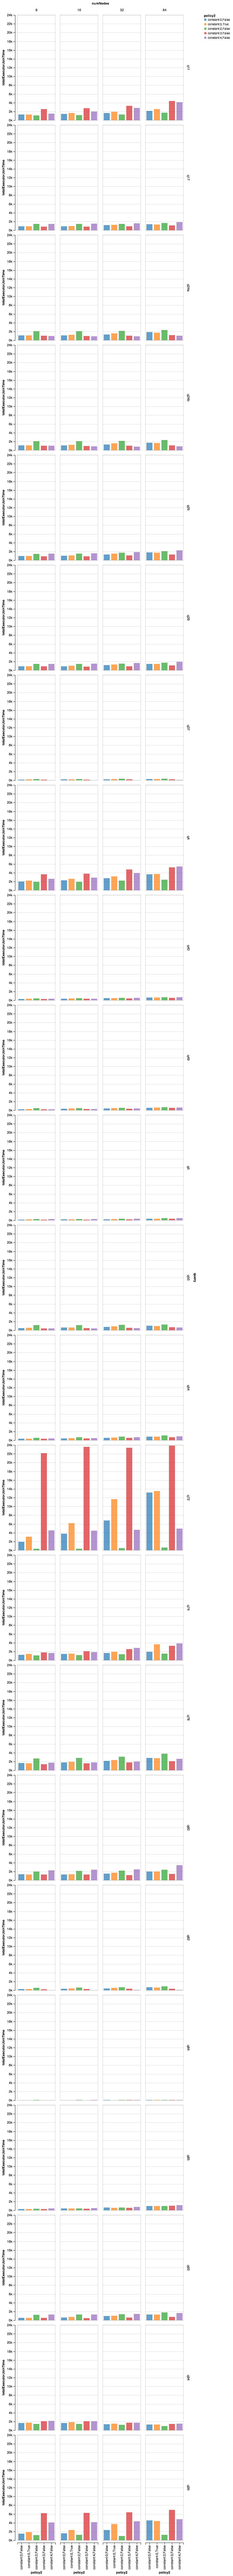

In [71]:
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/tpcds-scaling/tpcds-scaling-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards
df = df[df['numNodes'] > 4]
df = df[df['index'] > 0]

#df = df[df['policy'] == 'constant:0']


df2 = df.copy()
df2['totalExecutorJoinTime'] = df2['totalExecutorJoinTime']/1e3
df2["policy2"] = df2["policy"] + ',' + df2["disableMulticore"].map(str)
VegaLite({
  "mark": "bar",
  "encoding": {
    "y": {"type": "quantitative","field": "totalExecutorJoinTime"},
    "x": {"type": "nominal","field": "policy2"},

    "color": {"type": "nominal","field": "policy2"},

    "column": {"type": "quantitative", "field": "numNodes"},
     "row": {"field": "query", "type": 'nominal'}
  }
}, df2)




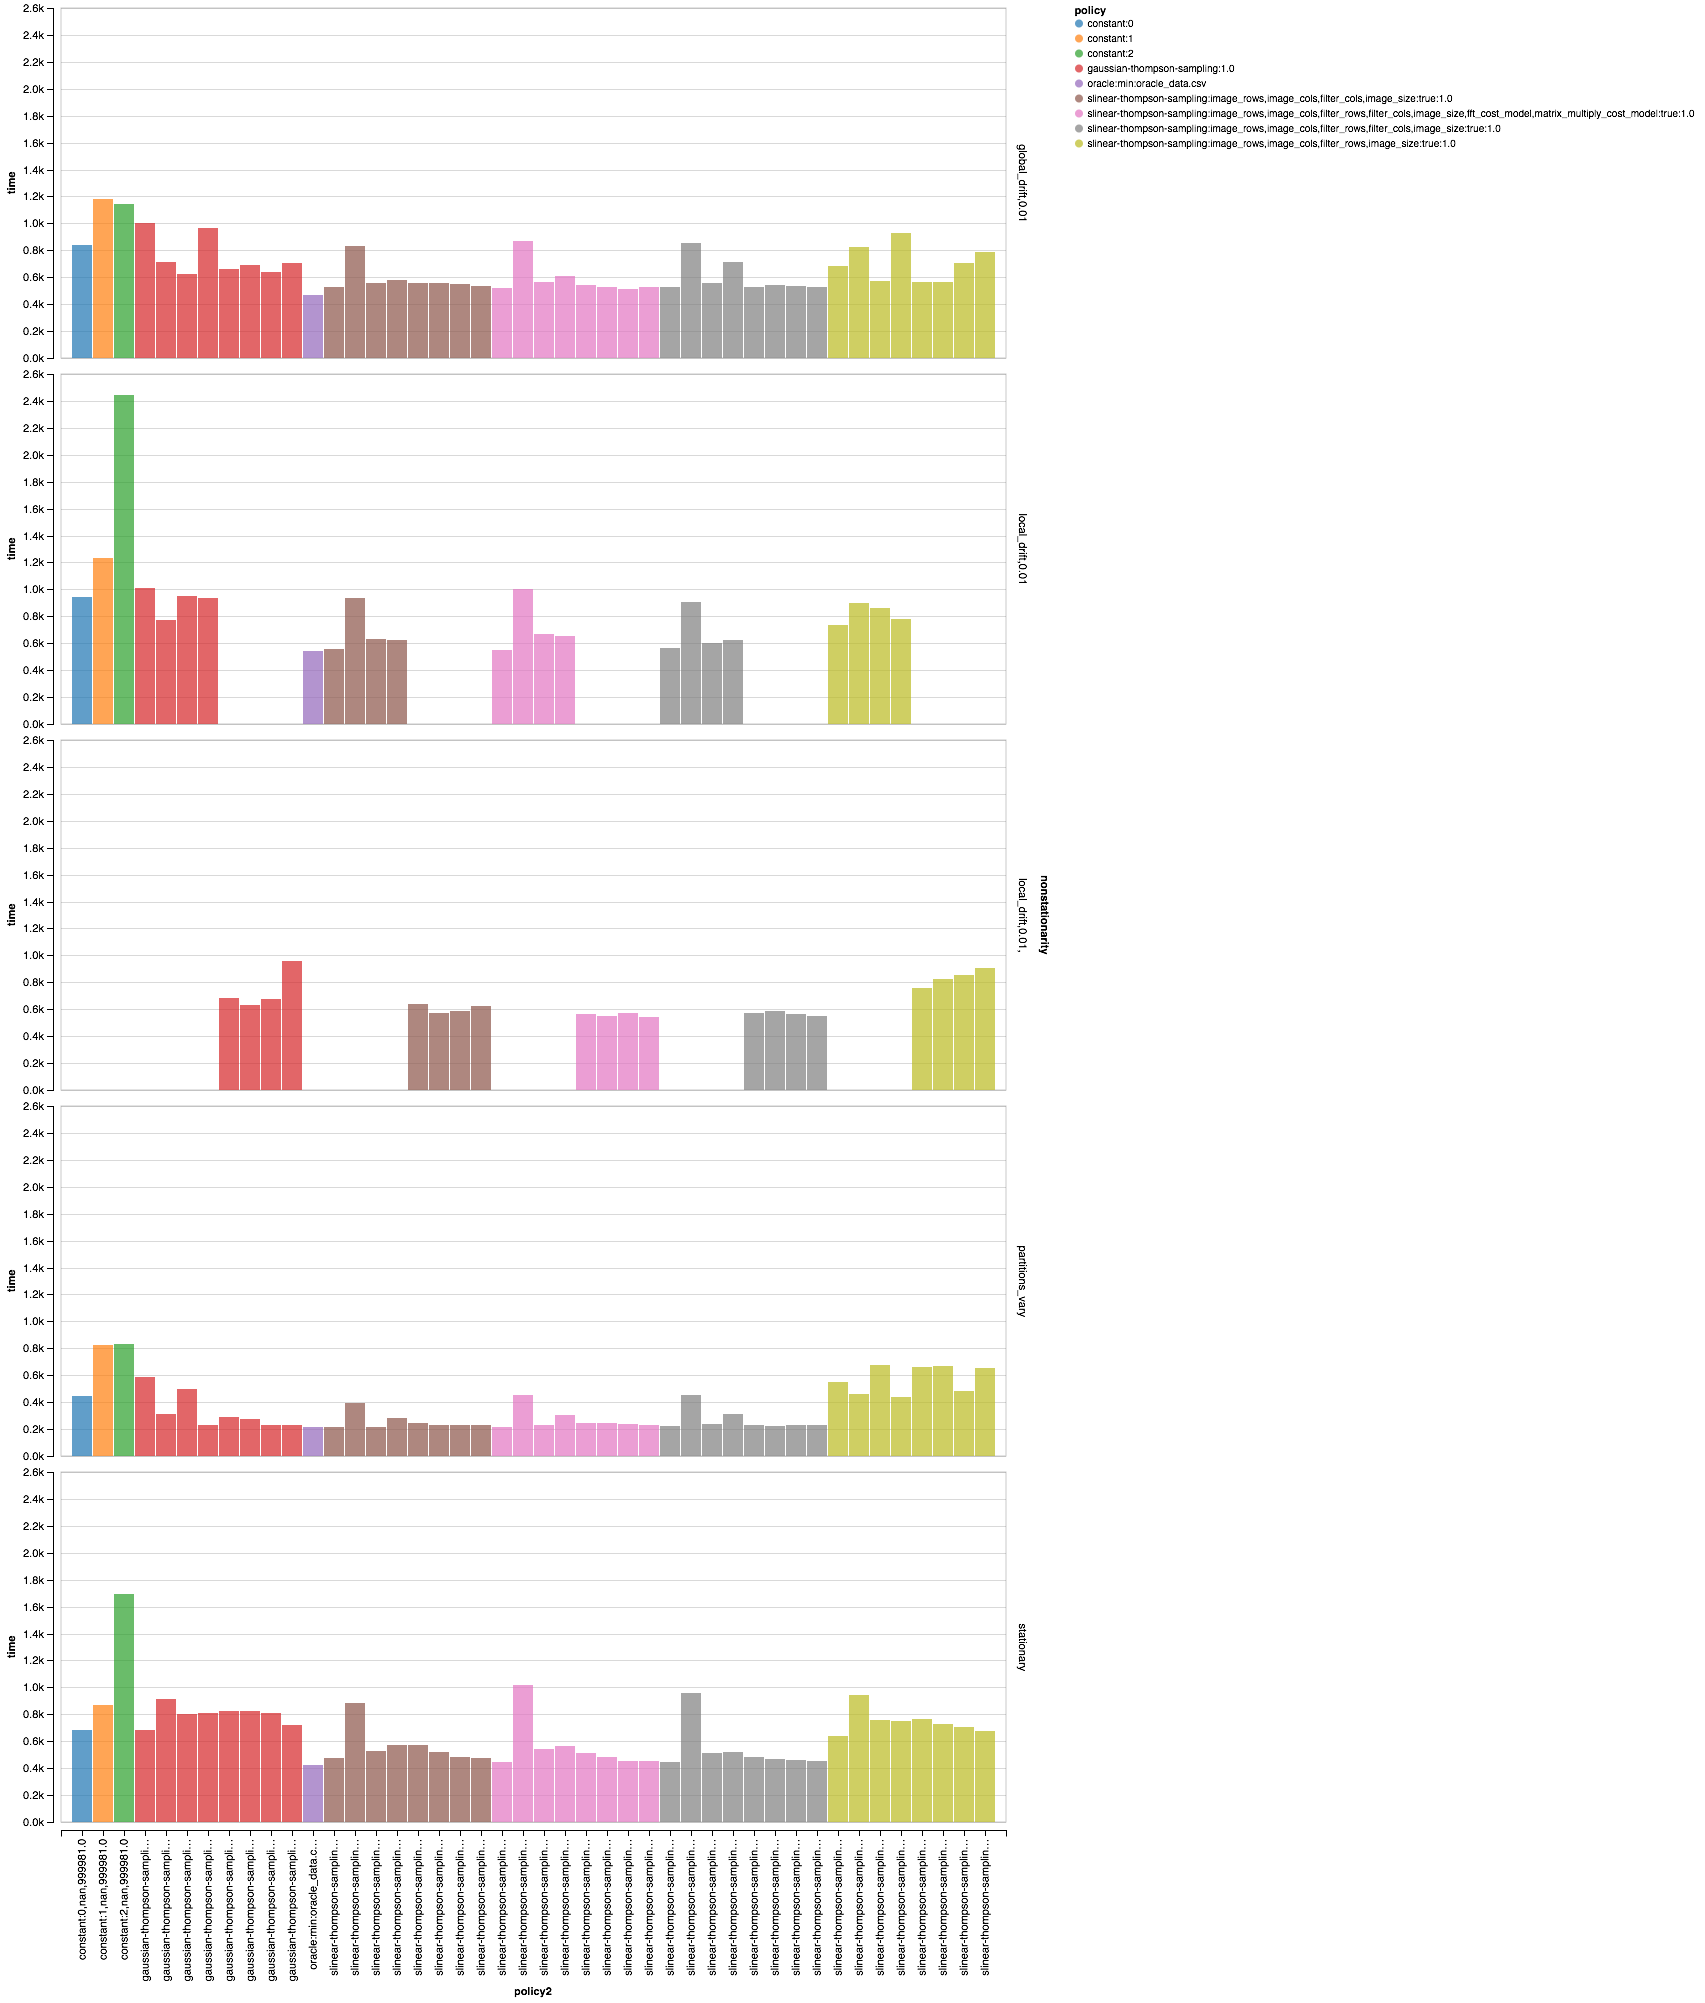

In [73]:
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/flickr-nonstationary/flickr-nonstationary-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards.copy()
df = df[df['partition_id'] == -1]
#df = df[df['policy'] == 'constant:0']


df['time'] = df['globalTime']/1e3
df["policy2"] = df["policy"] + ',' + df['tag'].map(str) + ',' + df['clusterCoefficient'].map(str)
VegaLite({
  "mark": "bar",
  "encoding": {
    "y": {"type": "quantitative","field": "time"},
    "x": {"type": "nominal","field": "policy2"},

    "color": {"type": "nominal","field": "policy"},

      "row": {"type": "nominal", "field": "nonstationarity"}

  }
}, df)





In [79]:
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/flickr-nonstationary/flickr-nonstationary-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards.copy()
df = df[df['partition_id'] > -1]

import numpy as np
df['time_in_sec'] = (df['system_nano_end_time'] - df['system_nano_start_time']) / 1e9
df = df[['policy', 'tag', 'clusterCoefficient', 'nonstationarity', 'time_in_sec']]

#df = df[df['policy'] == "constant:0"]

#df = df[df['policy'] == 'constant:0']

df = df.groupby(['policy', 'tag', 'clusterCoefficient', 'nonstationarity']).describe()
df

,partition_id,pos_in_partition,canonical_tuple_id,img_x_dim,img_y_dim,filter_rows,filter_cols,system_nano_start_time,system_nano_end_time,arm,...,crops,patches,driftRate,driftCoefficient,clusterCoefficient,communicationRate,disableMulticore,numParts,globalTime,tag
0,0,0,32_0,250,167,3,75,165034635833832,165034670515328,0,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
1,0,1,64_0,185,250,3,75,165034670868891,165034704174540,0,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
2,0,2,96_0,250,166,3,75,165034704259099,165035107240544,2,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
3,0,3,128_0,187,250,3,75,165035107340452,165035160239365,1,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
4,0,4,160_0,187,250,3,75,165035160335914,165035444709053,2,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
5,0,5,192_0,156,250,3,75,165035444774554,165035487984888,1,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
6,0,6,224_0,187,250,3,75,165035488121339,165035521076561,0,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
7,0,7,256_0,166,250,3,75,165035521146047,165035548164219,0,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
8,0,8,288_0,187,250,3,75,165035548242321,165035577345092,0,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
9,0,9,320_0,187,250,3,75,165035577431052,165035606628198,0,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart


In [106]:
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/flickr-nonstationary/flickr-nonstationary-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)



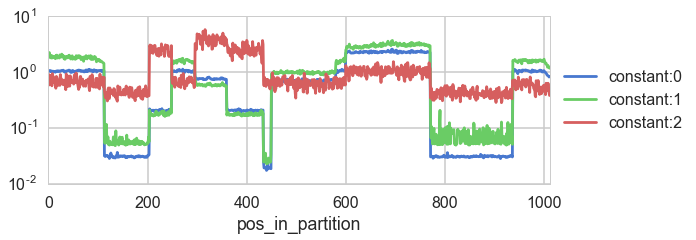

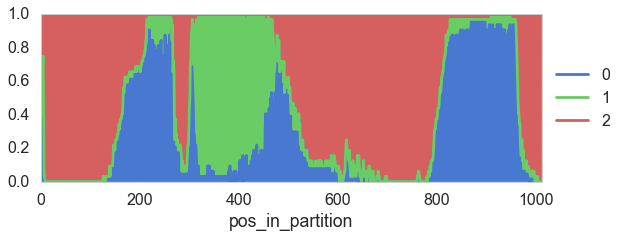

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster", font_scale=1.0)
plt.figure(figsize=(8, 3))

nonstationarity = 'global_drift,0.01'
df2 = bandit_rewards.copy()
df2 = df2[df2['partition_id'] > -1]
df2 = df2[df2['policy'] == "gaussian-thompson-sampling:1.0"]
df2 = df2[df2['tag'] == 'shareSmart']
df2 = df2[df2['clusterCoefficient'] == 1]
df2 = df2[df2['nonstationarity'] == nonstationarity]


df3 = bandit_rewards.copy()
df3 = df3[df3['partition_id'] > -1]
df3 = df3[df3['nonstationarity'] == nonstationarity]
df3 = df3[df3['policy'].str.startswith('constant')]
df3['time_in_sec'] = (df3['system_nano_end_time'] - df3['system_nano_start_time']) / 1e9
df3 = df3[['pos_in_partition', 'time_in_sec', 'policy']]
df3 = df3.groupby(['pos_in_partition', 'policy'], as_index=False).agg(np.mean)
df3 = df3.pivot(index='pos_in_partition', columns='policy', values='time_in_sec')


df2 = df2[['pos_in_partition', 'arm']]#df2[['policy', 'tag', 'clusterCoefficient', 'pos_in_partition', 'arm', 'nonstationarity']]
df2['count'] = 1
df2 = df2.groupby(['pos_in_partition', 'arm'], as_index=False).agg(np.sum)
df2 = df2.pivot(index='pos_in_partition', columns='arm', values='count').fillna(0)
df2 = df2.div(df2.sum(axis=1), axis=0) # Normalize the rows

#df2.plot()
df3.plot(figsize=(8, 3), logy=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

df2.plot(kind='area', figsize=(8, 3))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

#df2[0]
#sinplot()
#plt.show()

In [112]:
import matplotlib
matplotlib.style.library.keys()

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']